# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

C:\Users\10709151\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING = 0.001
EPOCHS = 50
BATCH_SIZE = 256
DECAY = 0
MOMENTUM = 0.95

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
## Adam
keras.backend.clear_session() # 把舊的 Graph 清掉
print("Experiment with optimizer: Adam")
model1 = build_mlp(input_shape=x_train.shape[1:])
model1.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING, decay=DECAY)
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model1.fit(x_train, y_train, 
            epochs=EPOCHS, 
            batch_size=BATCH_SIZE, 
            validation_data=(x_test, y_test), 
            shuffle=True)
    
# Collect results
train_loss = model1.history.history["loss"]
valid_loss = model1.history.history["val_loss"]
train_acc = model1.history.history["acc"]
valid_acc = model1.history.history["val_acc"]
    
exp_name_tag = "optimizer:Adam"
results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}
## Adagrad
keras.backend.clear_session() # 把舊的 Graph 清掉
print("Experiment with optimizer: Adagrad")
model2 = build_mlp(input_shape=x_train.shape[1:])
model2.summary()
optimizer = keras.optimizers.Adagrad(lr=LEARNING, decay=DECAY)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model2.fit(x_train, y_train, 
            epochs=EPOCHS, 
            batch_size=BATCH_SIZE, 
            validation_data=(x_test, y_test), 
            shuffle=True)
    
# Collect results
train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]
train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]
    
exp_name_tag = "optimizer:Adagrad"
results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}

## RMSprop
keras.backend.clear_session() # 把舊的 Graph 清掉
print("Experiment with optimizer: RMSprop")
model3 = build_mlp(input_shape=x_train.shape[1:])
model3.summary()
optimizer = keras.optimizers.RMSprop(lr=LEARNING, rho=0.9, epsilon=None, decay=0.0)
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model3.fit(x_train, y_train, 
            epochs=EPOCHS, 
            batch_size=BATCH_SIZE, 
            validation_data=(x_test, y_test), 
            shuffle=True)
    
# Collect results
train_loss = model3.history.history["loss"]
valid_loss = model3.history.history["val_loss"]
train_acc = model3.history.history["acc"]
valid_acc = model3.history.history["val_acc"]
    
exp_name_tag = "optimizer:RMSprop"
results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}

## SGD
keras.backend.clear_session() # 把舊的 Graph 清掉
print("Experiment with optimizer: SGD")
model4 = build_mlp(input_shape=x_train.shape[1:])
model4.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING, nesterov=True, momentum=MOMENTUM)
model4.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model4.fit(x_train, y_train, 
            epochs=EPOCHS, 
            batch_size=BATCH_SIZE, 
            validation_data=(x_test, y_test), 
            shuffle=True)
    
# Collect results
train_loss = model4.history.history["loss"]
valid_loss = model4.history.history["val_loss"]
train_acc = model4.history.history["acc"]
valid_acc = model4.history.history["val_acc"]
    
exp_name_tag = "optimizer:SGD"
results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}

Experiment with optimizer: Adam
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.0101 - acc: 0.2783 - val_loss: 1.8896 - val_acc: 0.3230
Epoch 2/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.8179 - acc: 0.3606 - val_loss: 1.7798 - val_acc: 0.3709
Epoch 3/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7459 - acc: 0.3881 - val_loss: 1.7347 - val_acc: 0.3893
Epoch 4/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.6960 - acc: 0.4089 - val_loss: 1.7305 - val_acc: 0.3823
Epoch 5/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6597 - acc: 0.4229 - val_loss: 1.6649 - val_acc: 0.4074
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.6287 - acc: 0.4326 - val_loss: 1.6715 - val_acc: 0.4040
Epoch 7/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6061 - acc: 0.4401 - val_loss: 1.6488 - val_acc

50000/50000 [==============================] - 2s 50us/step - loss: 1.8936 - acc: 0.3159 - val_loss: 1.9222 - val_acc: 0.2935
Epoch 3/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.7852 - acc: 0.3577 - val_loss: 1.7302 - val_acc: 0.3716
Epoch 4/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.7119 - acc: 0.3886 - val_loss: 1.7721 - val_acc: 0.3624
Epoch 5/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6597 - acc: 0.4067 - val_loss: 1.6436 - val_acc: 0.4169
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6107 - acc: 0.4233 - val_loss: 1.7097 - val_acc: 0.4004
Epoch 7/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5760 - acc: 0.4364 - val_loss: 1.7187 - val_acc: 0.3908
Epoch 8/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.5403 - acc: 0.4508 - val_loss: 1.5462 - val_acc: 0.4519
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6606 - acc: 0.4205 - val_loss: 1.6391 - val_acc: 0.4269
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6141 - acc: 0.4351 - val_loss: 1.6008 - val_acc: 0.4411
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5768 - acc: 0.4477 - val_loss: 1.5852 - val_acc: 0.4389
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5429 - acc: 0.4597 - val_loss: 1.5498 - val_acc: 0.4600
Epoch 8/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5156 - acc: 0.4689 - val_loss: 1.5220 - val_acc: 0.4653
Epoch 9/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4875 - acc: 0.4799 - val_loss: 1.5095 - val_acc: 0.4633
Epoch 10/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4645 - acc: 0.4849 - val_loss: 1.5091 - val_acc: 0.4680
Epoch 11/50
50000/50000 [===============

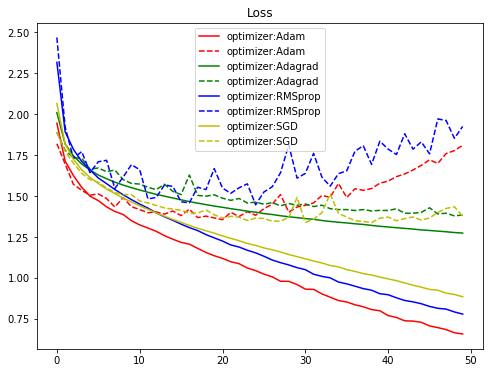

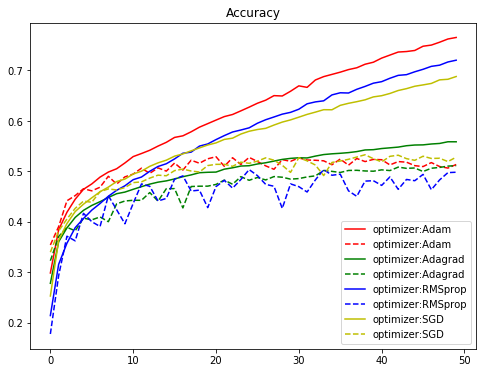

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()